In [48]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse
import random as rd

In [52]:
data = pd.read_excel('PredictorData2022_1.xlsx', sheet_name='Monthly ')
print(data)


      yyyymm        DY  EP ratio       b/m     tbl     dfr     lty      ts  \
0     192612  1.648601 -2.386837  0.441476  0.0307  0.0100  0.0354  0.0047   
1     192701  1.641821 -2.374773  0.443706  0.0323  0.0095  0.0351  0.0028   
2     192702  1.672224 -2.430353  0.428501  0.0329  0.0092  0.0347  0.0018   
3     192703  1.635117 -2.445079  0.469765  0.0320  0.0092  0.0331  0.0011   
4     192704  1.638027 -2.471309  0.456754  0.0339  0.0090  0.0333 -0.0006   
...      ...       ...       ...       ...     ...     ...     ...     ...   
1147  202207  0.532197 -3.076276  0.218187  0.0223  0.0115  0.0290  0.0067   
1148  202208  0.451690 -3.042012  0.227429  0.0263  0.0108  0.0290  0.0027   
1149  202209  0.501707 -2.953150  0.249478  0.0313  0.0110  0.0352  0.0039   
1150  202210  0.607911 -3.055849  0.218935  0.0372  0.0116  0.0398  0.0026   
1151  202211  0.539165 -3.134758  0.207182  0.0415  0.0117  0.0389 -0.0026   

          ntis      infl       ltr      svar     SP500  
0     

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [53]:
# print summary statistics for train data
print("\nSummary statistics\n", data.describe())



Summary statistics
               yyyymm           DY     EP ratio          b/m          tbl  \
count    1152.000000  1152.000000  1152.000000  1152.000000  1152.000000   
mean   197448.166667     1.201447    -2.761218     0.552159     0.032931   
std      2772.457959     0.474459     0.420533     0.268291     0.030649   
min    192612.000000     0.074276    -4.836478     0.120510     0.000100   
25%    195011.750000     0.767390    -2.986049     0.323772     0.003800   
50%    197411.500000     1.238974    -2.810399     0.529101     0.027750   
75%    199811.250000     1.565990    -2.481701     0.738709     0.050700   
max    202211.000000     2.692266    -1.774952     2.028478     0.163000   

               dfr          lty           ts         ntis         infl  \
count  1152.000000  1152.000000  1152.000000  1152.000000  1152.000000   
mean      0.011160     0.049656     0.016725     0.015991     0.002467   
std       0.006781     0.028082     0.012924     0.025712     0.005266  

In [54]:
correl=data.drop('yyyymm',axis=1)
print("\nCorrelation matrix\n", correl.corr())


Correlation matrix
                 DY  EP ratio       b/m       tbl       dfr       lty  \
DY        1.000000  0.734733  0.850224  0.041209  0.400134  0.006940   
EP ratio  0.734733  1.000000  0.719272  0.280452  0.043944  0.189461   
b/m       0.850224  0.719272  1.000000  0.199496  0.470278  0.193948   
tbl       0.041209  0.280452  0.199496  1.000000 -0.060586  0.906788   
dfr       0.400134  0.043944  0.470278 -0.060586  1.000000  0.066711   
lty       0.006940  0.189461  0.193948  0.906788  0.066711  1.000000   
ts       -0.082645 -0.253404 -0.051676 -0.401138  0.288621  0.022434   
ntis      0.232634  0.155185  0.032674  0.032532 -0.180011 -0.062641   
infl     -0.029414  0.141609  0.079271  0.247157 -0.237192  0.215544   
ltr       0.009216  0.011865  0.009857  0.054066  0.073447  0.056430   
svar      0.137812 -0.087809  0.168351 -0.151910  0.535255 -0.104896   
SP500     0.064956  0.069032  0.089275 -0.011431  0.047665 -0.002427   

                ts      ntis      infl    

In [55]:
train = data.iloc[1:700]
val = data.iloc[700:1000]
test=data.iloc[1000:1153]

In [56]:
# Creating the "X" and "y" variables. We drop SP500 from "X"
X_train, X_val,X_test = train.drop(['SP500', 'yyyymm','b/m','tbl'], axis=1), val.drop(['SP500', 'yyyymm','b/m','tbl'], axis=1), test.drop(['SP500', 'yyyymm','b/m','tbl'], axis=1)
y_train, y_val,y_test = train[['SP500']], val[['SP500']], test[['SP500']]

In [75]:
# We have to scale our data in order to continue with our Ridge Regression!
# Scale data using the mean and standard deviation of the training set.
# This is not necessary for the simple logistic regression we will do here
# but should be done if L1 or L2 regrularization is carried out
X_test=(X_test-X_train.mean())/X_train.std()
X_val=(X_val-X_train.mean())/X_train.std()
X_train=(X_train-X_train.mean())/X_train.std()

In [76]:
# The alpha used by Python's ridge should be the lambda times the number of observations
alphas=[0.001*699,0.01*699, 0.02*699, 0.03*699, 0.04*699, 0.05*699, 0.075*699,0.1*699,0.2*699, 0.4*699]

In [77]:
# Importing Ridge
from sklearn.linear_model import Ridge
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.002183361066367518
0.002169573316575531
0.0021584650902566073
0.0021501465955567887
0.0021436467391760766
0.0021383870402391343
0.00212858490001543
0.0021215313330266265
0.002103834765571236
0.002083804426677365


In [78]:
###choosing alpha using k-fold cross validation
from sklearn.linear_model import RidgeCV
regr_cv= RidgeCV(alphas=alphas, fit_intercept=True, cv=10)
model_cv2=regr_cv.fit(X_train,y_train)
model_cv2.alpha_

279.6

In [79]:
# MSE at the training dataset
# MSE at the validation dataset
#we have to divide the mse of the training and the validation set with the number of observations that we used in each set
#in order to be comparable
ridge=Ridge(alpha=model_cv2.alpha_)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_train)
print(mse(y_train,pred))

0.00350566604004008


In [80]:
# MSE at the validation dataset
# MSE at the validation dataset
#we have to divide the mse of the training and the validation set with the number of observations that we used in each set
#in order to be comparable
ridge=Ridge(alpha=model_cv2.alpha_)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_val)
print(mse(y_val,pred))

0.002083804426677365


In [81]:
# MSE at the test dataset
# MSE at the test dataset
#we have to divide the mse of the training and the validation set with the number of observations that we used in each set
#in order to be comparable
ridge=Ridge(alpha=model_cv2.alpha_)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_test)
print(mse(y_test,pred))

0.0018441201074370181


In [102]:
print('R squared training set', round(ridge.score(X_train, y_train)*100, 2))
print('R squared test set', round(ridge.score(X_test, y_test)*100, 2))

R squared training set 2.48
R squared test set -0.22


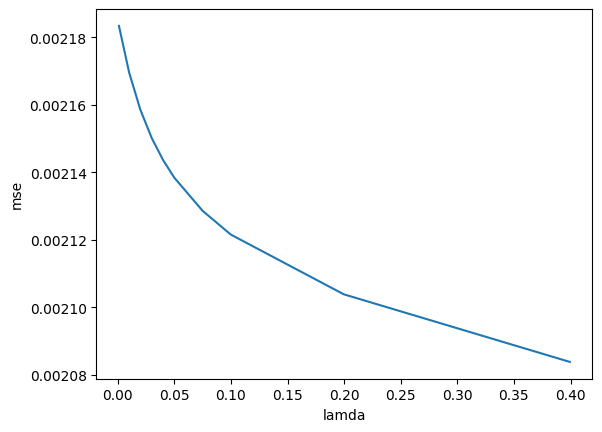

In [82]:
plt.xlabel('lamda')
plt.ylabel('mse')
lamdas = [i/700 for i in alphas]
plt.plot(lamdas, mses)


In [83]:
from sklearn.linear_model import RidgeCV
regr_cv= RidgeCV(alphas=alphas, fit_intercept=True, cv=10)
model_cv2=regr_cv.fit(X_train,y_train)
model_cv2.alpha_

279.6

In [84]:
# Ridge
# import model
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=model_cv2.alpha_)
ridge.fit(X_train, y_train)

# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(ridge.intercept_) + list(ridge.coef_[0])
    ]
).transpose().set_index(0)
ridgereg_coefficient = pd.DataFrame()
ridgereg_coefficient["Features"] = X_train.columns
ridgereg_coefficient['Coef Estimate'] = pd.Series(ridge.coef_[0])
ridgereg_coefficient
print(ridgereg_coefficient)

   Features  Coef Estimate
0        DY       0.001516
1  EP ratio       0.003472
2       dfr       0.000724
3       lty      -0.001042
4        ts       0.000353
5      ntis      -0.003920
6      infl      -0.002140
7       ltr       0.001978
8      svar       0.000512


In [85]:
##We can also select alpha based on the cross-validated ridge regression function, LassoCV().
##Selecting lambda
##Fit Lasso regression through cross validation

from sklearn.linear_model import LassoCV
regr_cv= LassoCV(alphas = None, cv = 10, max_iter = 100000)
model_cv2=regr_cv.fit(X_train,y_train)
model_cv2.alpha_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.006375847564339137

In [86]:
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.0020195333663287516
0.0020238421453398514
0.0020238421453398514
0.0020238421453398514
0.0020238421453398514
0.0020238421453398514
0.0020238421453398514


In [87]:
lasso = Lasso(alpha=model_cv2.alpha_)
lasso.fit(X_train, y_train)

# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)


lassoreg_coefficient = pd.DataFrame()
lassoreg_coefficient["Features"] = X_train.columns
lassoreg_coefficient['Coef Estimate'] = pd.Series(lasso.coef_)
lassoreg_coefficient

,Features,Coef Estimate
0,DY,0.0
1,EP ratio,0.0
2,dfr,0.0
3,lty,-0.0
4,ts,0.0
5,ntis,-0.0
6,infl,-0.0
7,ltr,0.0
8,svar,0.0


In [97]:
# MSE at the training dataset
lasso=Lasso(alpha=model_cv2.alpha_)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_train)
print(mse(y_train,pred))

0.0035948036131544306


In [98]:
# MSE at the validation dataset
lasso=Lasso(alpha=model_cv2.alpha_)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_val)
print(mse(y_val,pred))

0.0020238421453398514


In [99]:
# MSE at the test dataset
lasso=Lasso(alpha=model_cv2.alpha_)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_test)
print(mse(y_test,pred))

0.0018415281023263406
